In [11]:
# -*- coding: utf-8 -*-
# Implementação do k-NN com skLearn

import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [12]:

# Inicialização da lista de amostras separada em entrada e saída (classes)
entradas, saidas= [], []

In [13]:


# Carregar dados de arquivo CSV com amostras
with open('F:\\py\\Produtos_4_3.csv', 'r') as f:
#ler arquivo linha por linha
    for linha in f.readlines():
        # obter os atributos da amostra
        atrib = linha.replace('\n','').split(',')
        #entradas.append([float(atrib[0]), float(atrib[1]), float(atrib[2]), float(atrib[3])])
        #saidas.append(atrib[4])        
        entradas.append([(atrib[0]),(atrib[1]), (atrib[2])])
        saidas.append(atrib[1])        


In [35]:
# Separar 60% dos dados para treinamento e o restante fica para testar
p = 0.8
limite = int(p * len(entradas))

#Preparar o conjunto de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(entradas, saidas, random_state=0)

print(X_train)

[['400', '3', '1'], ['7999', '1', '4'], ['2199', '1', '1'], ['790', '2', '4'], ['1359', '3', '3'], ['1699', '2', '2'], ['1040', '3', '5'], ['700', '3', '5'], ['649', '3', '5'], ['539', '2', '3'], ['2990', '3', '5'], ['650', '3', '4'], ['599', '2', '1'], ['447', '3', '3'], ['539', '1', '5'], ['290', '2', '1'], ['5899', '1', '4'], ['499', '1', '4'], ['800', '3', '4'], ['1150', '2', '2'], ['1080', '1', '2'], ['1999', '2', '4'], ['4999', '2', '2'], ['880', '3', '5'], ['13999', '2', '1'], ['299', '3', '3'], ['490', '1', '3'], ['1499', '3', '1'], ['940', '3', '4'], ['3493', '3', '3'], ['599', '3', '3'], ['350', '3', '2'], ['639', '3', '4'], ['238', '2', '2'], ['640', '1', '5'], ['1130', '2', '4'], ['1050', '1', '3'], ['8699', '2', '4'], ['2499', '1', '4'], ['499', '3', '5'], ['4389', '1', '5'], ['980', '1', '3'], ['299', '2', '4'], ['1790', '3', '2'], ['12197', '1', '1'], ['8999', '1', '2'], ['1199', '1', '4'], ['14499', '2', '3'], ['4999', '3', '2'], ['2999', '2', '4'], ['1799', '3', '4'], 

In [22]:
# Let us use some visualization to understand our data. First convert the numpy arrays to a dataframe using pandas
produtos = pd.DataFrame(X_train, columns = ('order_products_value', 'customer_city', 'product_category_name'))
produtos.head()

,order_products_value,customer_city,product_category_name
0,400,3,1
1,7999,1,4
2,2199,1,1
3,790,2,4
4,1359,3,3


In [46]:
# Build the model using k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the class into an object
knn = KNeighborsClassifier(n_neighbors = 2)

In [47]:
knn.fit(X_train, y_train)

c:\users\-\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
c:\users\-\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [58]:
X_new = np.array([[399, 3,1]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 3)


In [59]:
# Predict the species of iris this would be.

prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(produtos['product_category_name'][prediction]))

Prediction: ['1']
Predicted target name: 1    NaN
Name: product_category_name, dtype: object


In [60]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 ['1' '2' '1' '1' '1' '1' '2' '1' '2' '2' '1' '2' '1' '3' '1' '2' '2' '1'
 '2' '3' '2' '1' '1' '1' '3' '1' '2' '2' '1' '1' '1' '1' '1' '1' '1' '2'
 '1' '1' '1' '1' '1' '1' '1' '2' '2' '2' '1' '1' '1' '1' '2' '1' '2' '1'
 '1' '1' '1' '3' '2' '2' '2' '2' '1' '1' '2' '2' '2' '2' '1' '2' '1' '3'
 '2' '3' '2']


c:\users\-\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
c:\users\-\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


In [61]:
# We can use the score method of the knn object, which will compute the prediction accuracy for us:
print("Prediction Accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Prediction Accuracy: 0.32


c:\users\-\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
c:\users\-\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


In [62]:
from sklearn.neighbors import KNeighborsClassifier
#instanciamos a classe.
#Nada impede de treiná-lo logo em seguida.
 
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train,y_train)


c:\users\-\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
c:\users\-\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [327]:
#Aqui armazeno as predições do algoritmo
#No caso aplicamos ele ao conjunto de teste
#Essa variavel servira para fazermos algumas métricas.
predictions = knn2.predict(X_test)
print(predictions)


['3' '3' '3' '3' '1' '1' '1' '1' '1' '2' '1' '3' '3' '3' '1' '1' '1' '1'
 '2' '1' '1' '2' '2' '1' '2' '2' '1' '3' '3' '1' '1' '2' '1' '3' '1' '1'
 '1' '3' '1' '3' '2' '2' '1' '3' '3' '1' '1' '1' '2' '3' '2' '1' '1' '2'
 '2' '3' '1' '1' '1' '1' '2' '2' '1' '3' '1' '1' '1' '1' '1' '1' '1' '3'
 '1' '1' '2' '2' '1' '1' '3' '3' '2' '1' '3' '3' '2' '3' '1' '2' '1' '3'
 '2' '1' '1' '3' '1' '1' '3' '2' '1' '2' '3' '1' '1' '3' '3' '1' '1' '1'
 '3' '1' '1' '1' '3' '2' '3' '1' '1' '1' '1' '2' '2' '1' '1' '3' '1' '1'
 '3' '1' '1' '1' '1' '2' '1' '3' '1' '1' '1' '1' '3' '3' '3' '3' '2' '1'
 '1' '3' '1' '2' '2' '3' '2' '1' '3' '2' '3' '1' '3' '3' '1' '3' '1' '2'
 '3' '1' '1' '1' '1' '3' '3' '1' '3' '3' '1' '3' '1' '3' '3' '1' '1' '2'
 '1' '3' '1' '1' '2' '3' '2' '1' '1' '2' '3' '1' '3' '3' '2' '1' '1' '3'
 '2' '3']


c:\users\-\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
c:\users\-\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


In [324]:
from sklearn import metrics

metrics.accuracy_score(y_test,predictions)

0.32

In [325]:
metrics.confusion_matrix(y_test,predictions)

array([[30, 14, 17],
       [41, 12, 22],
       [29, 13, 22]], dtype=int64)

In [291]:
print(limite)
print('entradas' , entradas[:limite])
print('sainda', saidas[:limite])


# Chamar a função do skLearn para aplicar o k-NN com K = 13
#knn = KNeighborsClassifier(n_neighbors=13)
knn = KNeighborsClassifier(n_neighbors=2)
# Ajustar o modelo usando "entradas" como dados de treinamento e "saidas" como valores-alvo
fit = knn.fit(entradas[:limite], saidas[:limite])
# Previsão dos rótulos das classes para o restante da base de dados
#rotulos_previstos = knn.predict(entradas[limite:])
rotulos_previstos = knn.predict(entradas)
teste = knn.kneighbors(n_neighbors=2)¶
print('rotulos' , rotulos_previstos)
print(len(rotulos_previstos))
print('saidads' , saidas)

SyntaxError: invalid character in identifier (<ipython-input-291-bd081ed6b804>, line 14)

In [289]:
# Contabilizar acertos para os dados de teste
acertos, indice_rotulo, i = 0, 0, 0

print(len(rotulos_previstos))
print(len(saidas))
#for i in range(limite, len(entradas)):
for i in range(limite,len(entradas)-1):
    print(i)
    print(rotulos_previstos[indice_rotulo],saidas[i])
    if rotulos_previstos[indice_rotulo] == saidas[i]:
        print('entrou')
        acertos += 1
    indice_rotulo += 1
print(indice_rotulo, i)
print(range(limite,len(entradas)-1))


299
299
239
3 1
240
3 1
241
1 1
entrou
242
1 1
entrou
243
1 1
entrou
244
1 2
245
1 3
246
3 3
entrou
247
3 3
entrou
248
1 1
entrou
249
1 3
250
2 3
251
1 3
252
1 1
entrou
253
3 3
entrou
254
2 3
255
2 1
256
2 1
257
2 2
entrou
258
2 3
259
2 1
260
1 2
261
1 1
entrou
262
1 1
entrou
263
3 1
264
1 3
265
1 3
266
1 1
entrou
267
1 3
268
1 3
269
1 1
entrou
270
1 2
271
1 3
272
1 3
273
2 2
entrou
274
2 3
275
2 3
276
1 2
277
1 1
entrou
278
2 2
entrou
279
1 2
280
1 3
281
1 2
282
1 3
283
1 3
284
1 2
285
2 1
286
1 3
287
1 2
288
1 2
289
1 2
290
2 1
291
2 2
entrou
292
1 2
293
2 2
entrou
294
2 1
295
2 1
296
1 1
entrou
297
1 2
59 297
range(239, 298)


In [290]:
print('Total de treinamento: %d' % limite)
print('Total de testes: %d' % (len(entradas) - limite))
print('Total de acertos: %d' % acertos)
print('Porcentagem de acertos: %.2f%%' % (100 * acertos / (len(entradas) - limite)))

print('limite', limite)

Total de treinamento: 239
Total de testes: 60
Total de acertos: 19
Porcentagem de acertos: 31.67%
limite 239


In [232]:
#######################################
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

     order_products_value  customer_city  product_category_name
279                   299              2                      4
280                   299              3                      3
281                   290              2                      1
282                   290              3                      1
283                   290              3                      4
284                   279              2                      2
285                   250              1                      1
286                   249              3                      3
287                   238              2                      2
288                   226              2                      5
289                   219              2                      5
290                   189              1                      2
291                   189              2                      3
292                   161              2                      5
293                   152              2

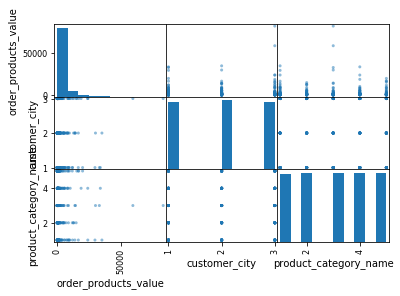

In [194]:


names = ['order_products_value', 'customer_city', 'product_category_name']
dataset = pd.read_csv('F:\\py\\Produtos_4_3.csv', names=names)


print(dataset.tail(20))
print(dataset.groupby('customer_city').size())

scatter_matrix(dataset)
plt.show()



In [195]:

# Split-out validation dataset
array = dataset.values
X = array[:,0:2]
Y = array[:,2]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [198]:
# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=3, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print(cv_results)

KNN: 0.209283 (0.016628)
[0.2125    0.1875    0.2278481]
